In [1]:
# pip install tensorflow

In [2]:
# pip install pandas

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import glob
import cv2
import keras
import keras as k
from tensorflow.keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense, Dropout
from keras.models import model_from_json
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.utils.np_utils import to_categorical

2022-04-18 12:30:47.523236: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-18 12:30:47.523278: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [4]:
import os
f=os.listdir('Data/dataset/train')
print(f)

['rottenapple', 'freshoranges', 'rottenoranges', 'freshbanana', '.ipynb_checkpoints', 'rottenbanana', 'freshapple']


In [5]:
print(glob.glob('Data/dataset/train/*'))

['Data/dataset/train/rottenapple', 'Data/dataset/train/freshoranges', 'Data/dataset/train/rottenoranges', 'Data/dataset/train/freshbanana', 'Data/dataset/train/rottenbanana', 'Data/dataset/train/freshapple']


In [6]:
fruits=[]
labels=[]
for fruits_path in glob.glob('Data/dataset/train/*'):
  fruit_lable=fruits_path.split("/")[-1]
  for img_path in glob.glob(os.path.join(fruits_path,"*.png")):
    img=cv2.imread(img_path ,cv2.IMREAD_COLOR)
    img=cv2.resize(img,(110,110))
    img=cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    fruits.append(img)
    labels.append(fruit_lable)
fruits=np.array(fruits)
labels=np.array(labels)

In [7]:
fruits.shape,labels.shape

((150, 110, 110, 3), (150,))

In [8]:
label_to_id_dict = {v:i for i,v in enumerate(np.unique(labels))}
id_to_label_dict = {v: k for k, v in label_to_id_dict.items()}
id_to_label_dict
label_ids = np.array([label_to_id_dict[x] for x in labels])
fruits.shape, label_ids.shape, labels.shape

((150, 110, 110, 3), (150,), (150,))

In [9]:
valid_fruit_images = []
valid_labels = [] 
for fruit_dir_path in glob.glob("Data/dataset/train/*"):
    fruit_label = fruit_dir_path.split("/")[-1]
    for image_path in glob.glob(os.path.join(fruits_path, "*.png")):
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)
        image = cv2.resize(image, (110, 110))
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        valid_fruit_images.append(image)
        valid_labels.append(fruit_label)
valid_fruit_images = np.array(valid_fruit_images)
valid_labels = np.array(valid_labels)

In [10]:
valid_fruit_images.shape

(150, 110, 110, 3)

In [11]:
valid_labels.shape

(150,)

In [12]:
label_to_id_dict = {v:i for i,v in enumerate(np.unique(valid_labels))}
id_to_label_dict = {v: k for k, v in label_to_id_dict.items()}

In [13]:
label_to_id_dict

{'freshapple': 0,
 'freshbanana': 1,
 'freshoranges': 2,
 'rottenapple': 3,
 'rottenbanana': 4,
 'rottenoranges': 5}

In [14]:
id_to_label_dict

{0: 'freshapple',
 1: 'freshbanana',
 2: 'freshoranges',
 3: 'rottenapple',
 4: 'rottenbanana',
 5: 'rottenoranges'}

In [15]:
valid_label_ids = np.array([label_to_id_dict[x] for x in valid_labels])

In [16]:
valid_label_ids

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [17]:
X_train, X_test = fruits, valid_fruit_images
Y_train, Y_test = label_ids, valid_label_ids

In [18]:
X_train.shape,X_test.shape

((150, 110, 110, 3), (150, 110, 110, 3))

In [19]:
Y_test.shape,Y_train.shape

((150,), (150,))

In [20]:
X_train = X_train/255
X_test = X_test/255

In [21]:
X_flat_train = X_train.reshape(X_train.shape[0], 110*110*3)
X_flat_test = X_test.reshape(X_test.shape[0], 110*110*3)

In [22]:
X_flat_train.shape ,X_flat_test.shape

((150, 36300), (150, 36300))

In [23]:
# from keras.utils.np_utils import to_categorical
Y_train =tf.keras.utils.to_categorical(Y_train, 6)
Y_test = tf.keras.utils.to_categorical(Y_test, 6)

In [24]:
# !pip install keras.utils
# tensorflow.keras.utils import to_categorical

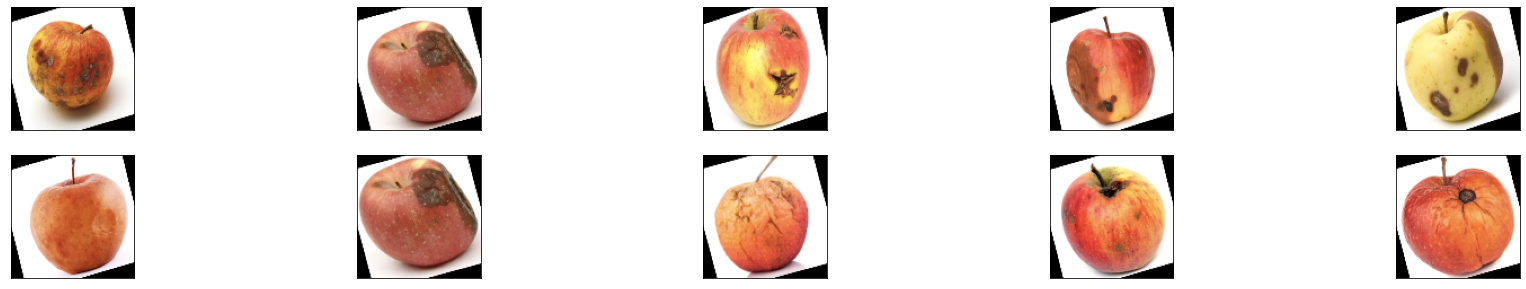

In [25]:
fig = plt.figure(figsize =(30,5))
for i in range(10):
    ax = fig.add_subplot(2,5,i+1,xticks=[],yticks=[])
    ax.imshow(np.squeeze(X_train[i]))

In [26]:
model_cnn = Sequential()
model_cnn.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(110, 110, 3)))
model_cnn.add(Conv2D(64, (3, 3), activation='relu'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn.add(Dropout(0.25))
model_cnn.add(Flatten())
model_cnn.add(Dense(120, activation='relu'))
model_cnn.add(Dropout(0.5))
model_cnn.add(Dense(6, activation='sigmoid'))

2022-04-18 12:30:50.972563: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/ubuntu/defect/defects/lib/python3.8/site-packages/cv2/../../lib64:
2022-04-18 12:30:50.972606: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-04-18 12:30:50.972633: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ip-172-31-2-50): /proc/driver/nvidia/version does not exist
2022-04-18 12:30:50.972956: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [27]:
model_cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 108, 108, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 106, 106, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 53, 53, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 53, 53, 64)        0         
                                                                 
 flatten (Flatten)           (None, 179776)            0         
                                                                 
 dense (Dense)               (None, 120)               21573240  
                                                        

In [28]:
model_cnn.compile(loss=keras.losses.categorical_crossentropy,optimizer=Adam(),metrics=['accuracy'])

In [29]:
model_cnn.fit(X_train, Y_train,batch_size=100,epochs=30,verbose=1,validation_data=(X_test, Y_test))

Epoch 1/30
2/2 [==============================] - 7s 3s/step - loss: 6.4718 - accuracy: 0.1600 - val_loss: 10.7467 - val_accuracy: 0.1667
Epoch 2/30
2/2 [==============================] - 6s 3s/step - loss: 9.8092 - accuracy: 0.2333 - val_loss: 3.1159 - val_accuracy: 0.1667
Epoch 3/30
2/2 [==============================] - 6s 3s/step - loss: 3.7106 - accuracy: 0.2267 - val_loss: 1.9902 - val_accuracy: 0.1667
Epoch 4/30
2/2 [==============================] - 6s 3s/step - loss: 1.6942 - accuracy: 0.3533 - val_loss: 2.0048 - val_accuracy: 0.1667
Epoch 5/30
2/2 [==============================] - 6s 3s/step - loss: 1.3816 - accuracy: 0.4333 - val_loss: 2.7289 - val_accuracy: 0.1667
Epoch 6/30
2/2 [==============================] - 7s 4s/step - loss: 1.3170 - accuracy: 0.4467 - val_loss: 2.8871 - val_accuracy: 0.1667
Epoch 7/30
2/2 [==============================] - 7s 3s/step - loss: 1.1279 - accuracy: 0.5133 - val_loss: 2.9276 - val_accuracy: 0.1667
Epoch 8/30
2/2 [========================

In [30]:
score = model_cnn.evaluate(X_test, Y_test, verbose=0)

In [31]:
score

[11.268268585205078, 0.1666666716337204]

In [32]:
from keras.models import load_model
model_cnn.save('model.h5')

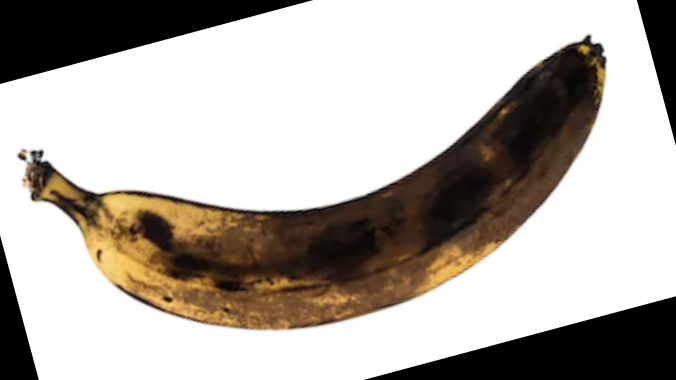

In [33]:
from PIL import Image
Image.open('/home/ubuntu/defect/Data/dataset/test/rottenbanana/rotated_by_15_Screen Shot 2018-06-12 at 8.47.51 PM.png')

In [34]:
import cv2
img_arr=cv2.imread("/home/ubuntu/defect/Data/dataset/test/rottenbanana/rotated_by_15_Screen Shot 2018-06-12 at 8.47.51 PM.png")
test_set=[]
img_arr=cv2.resize(img_arr,(110,110))
img_arr=img_arr/255
np.max(img_arr)
img_arr=img_arr.reshape(110,110,3)
test_set.append(img_arr)
test=np.array(test_set)

In [35]:
predict=model_cnn.predict(test)
np.argmax(predict)

4

In [36]:
value=np.argmax(predict)
print(value)
lb=list(label_to_id_dict.keys())
print(lb)
print(lb[value])

4
['freshapple', 'freshbanana', 'freshoranges', 'rottenapple', 'rottenbanana', 'rottenoranges']
rottenbanana
